In [1]:
import pandas as pd #ordered probit
data=pd.read_csv('diamonds.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [2]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)
data["cut"] = data["cut"].astype(cat_type)

In [7]:
data['cut'].dtype

CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)

In [8]:
data['volume'] = data['x']*data['y']*data['z']
data.drop(['x','y','z'],axis=1,inplace=True)

Text(0.5, 1.0, 'Distribution by Volume')

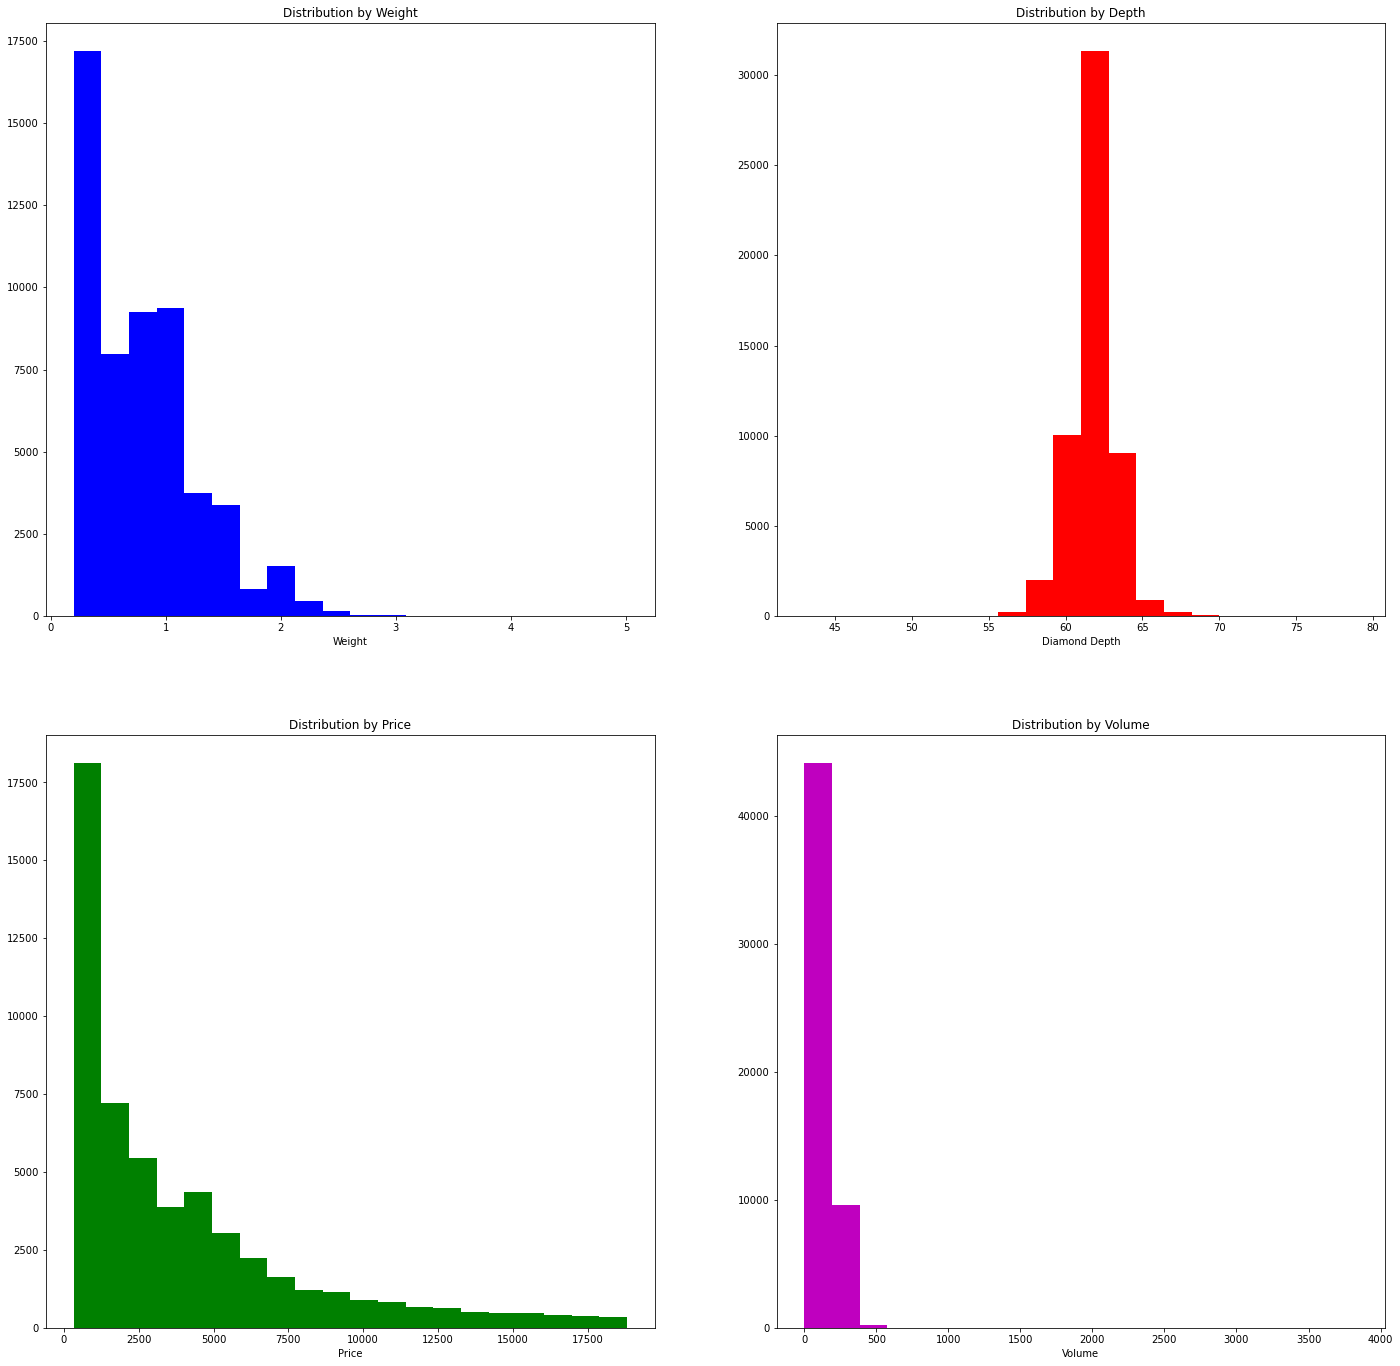

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=[24,24])
 
plt.subplot(221)
plt.hist(data['carat'],bins=20,color='b')
plt.xlabel('Weight')
plt.title('Distribution by Weight')
 
plt.subplot(222)
plt.hist(data['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth')
plt.title('Distribution by Depth')
 
plt.subplot(223)
plt.hist(data['price'],bins=20,color='g')
plt.xlabel('Price')
plt.title('Distribution by Price')
 
plt.subplot(224)
plt.hist(data['volume'],bins=20,color='m')
plt.xlabel('Volume')
plt.title('Distribution by Volume')

In [10]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
mod_prob = OrderedModel(data['cut'],data[['volume', 'price', 'carat']],distr='probit')

In [11]:
res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.369122
         Iterations: 29
         Function evaluations: 35
         Gradient evaluations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -73850.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Sun, 15 May 2022                                         
Time:                        23:59:16                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
volume                0.0060      0.001     10.108      0.000       0.005       0.007
price              3.511e-05   3.01e-06     11.658      0.000    2.92e-05     4.1e-05
carat                -1.1049      0.097    -11.353      0.000      -1.296      -0.914
Fair/Good            -1.8589      0.016   -119.403      0.000      -1.889      -1.828
Good/Ideal           -0.3292      0.014    -24.056      0.000      -0.356      -0.302
Ideal/Very Good       0.2053      0.006     35.080      0.000       0.194       0.217
Very Good/Premium    -0.4986      0.008    -60.605      0.000      -0.515      -0.483
=====================================================================================
"""

In [ ]:
#ordered logit 

In [12]:
mod_prob = OrderedModel(data['cut'],data[['volume', 'price', 'carat']],distr='logit')
res_log = mod_prob.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.369215
         Iterations: 36
         Function evaluations: 42
         Gradient evaluations: 42


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -73855.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Mon, 16 May 2022                                         
Time:                        00:01:08                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
volume                0.0104      0.002      5.875      0.000       0.007       0.014
price              2.348e-05   5.31e-06      4.425      0.000    1.31e-05    3.39e-05
carat                -1.5407      0.286     -5.394      0.000      -2.100      -0.981
Fair/Good            -3.2836      0.031   -105.758      0.000      -3.344      -3.223
Good/Ideal            0.4038      0.015     27.062      0.000       0.375       0.433
Ideal/Very Good       0.7301      0.006    116.508      0.000       0.718       0.742
Very Good/Premium    -0.0055      0.008     -0.653      0.514      -0.022       0.011
=====================================================================================
"""

In [14]:
predicted = res_log.model.predict(res_log.params, exog=data[['volume', 'price', 'carat']])
predicted

F:\Software\Anaconda\envs\exp2\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


array([[0.03443606, 0.10308231, 0.42201809, 0.21495304, 0.2255105 ],
       [0.03468862, 0.10372996, 0.42298246, 0.21440769, 0.22419127],
       [0.03447851, 0.10319128, 0.42218114, 0.21486137, 0.2252877 ],
       ...,
       [0.03052062, 0.09285935, 0.40522189, 0.22335735, 0.2480408 ],
       [0.02973833, 0.0907751 , 0.40141256, 0.22500614, 0.25306787],
       [0.02970169, 0.09067712, 0.4012301 , 0.22508295, 0.25330815]])